<a href="https://colab.research.google.com/github/BethelsandoGW/Gas-Type-Identification/blob/main/CNN_1D_Gas_Type_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (Dataset Matrik)

## Mengimport library apa saja yang digunakan

In [ ]:
# Library untuk proses file dataset
import os
import pandas as pd
import glob
import csv


# Library untuk menyimpan data array
import numpy as np

# Library untuk pre-processing dataset
from sklearn.model_selection import train_test_split # untuk membagi dataset berdasarkan rasio
from sklearn.preprocessing import StandardScaler, OneHotEncoder # untuk labeling dataset

# Library untuk visualisasi dataset
import matplotlib.pyplot as plt

# Library untuk visualisasi train dan testing
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Library untuk proses CNN 1D
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Library untuk visualisasi model CNN
import tensorflow as tf

## Menghubungkan Colab dengan Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Memproses dataset

In [ ]:
# fungsi untuk mengubah memproses dataset kedalam sebuah dataframe
def create_dataframe(directory, file_extension):
    files = []
    labels = []

    folders = sorted([folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))])

    for folder in folders:
        folder_path = os.path.join(directory, folder)
        folder_files = glob.glob(os.path.join(folder_path, '*.'+file_extension))  # Mendapatkan semua file dalam folder

        for file in folder_files:
            files.append(file)
            labels.append(folder)

    data = np.array([files, labels]).T
    df = pd.DataFrame(data, columns=['Path', 'Label'])

    return df

# Ubah 'path_ke_folder' dengan direktori tempat folder-folder dan file-file yang ingin Anda ambil path dan beri label
path_ke_folder = '/content/drive/MyDrive/Dataset/.3.DATASET MATRIK'

# Ubah sesuai ekstensi file yang akan digunakan (txt, csv, jpg)
file_extension = 'csv'

# memanggil fungsi proses dataset ke dataframe
df = create_dataframe(path_ke_folder, file_extension)

# Menampilkan DataFrame
df

,Path,Label
0,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,1. M. BOTANA
1,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,1. M. BOTANA
2,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,1. M. BOTANA
3,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,1. M. BOTANA
4,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,1. M. BOTANA
...,...,...
116,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,8. M KOSONG TANPA PLASTIK
117,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,8. M KOSONG TANPA PLASTIK
118,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,8. M KOSONG TANPA PLASTIK
119,/content/drive/MyDrive/Dataset-Disertasi/.3.DA...,8. M KOSONG TANPA PLASTIK


In [ ]:
# Untuk menampilkan label (class) apa saja yang ada
df_filtered = df.groupby('Label').first().reset_index()
df_filtered['Label']

0                 1. M. BOTANA
1                2. M.TEMBAKAU
2                3. M. KNALPOT
3                4. M. AMONIAK
4                5. M. ALKOHOL
5              6. M. PERTALITE
6            7. PLASTIK KOSONG
7    8. M KOSONG TANPA PLASTIK
Name: Label, dtype: object

## Undersampling data (menyamaratakan ukuran data pada setiap kelas)

In [ ]:
import pandas as pd
from collections import Counter
from sklearn.utils import resample

# Anggap Anda memiliki DataFrame df dengan kolom X dan y
# Pastikan data sudah dibagi ke dalam kelompok-kelompok kelas

# Hitung jumlah sampel dalam setiap kelas
counter = Counter(df['Label'])

# Tentukan jumlah sampel terkecil dalam kelas
min_samples = min(counter.values())

# Lakukan undersampling pada setiap kelas yang memiliki lebih banyak sampel
undersampled_data = pd.DataFrame()

for cls in counter.keys():
    cls_data = df[df['Label'] == cls]
    undersampled_cls_data = resample(cls_data, n_samples=min_samples, random_state=42)
    undersampled_data = pd.concat([undersampled_data, undersampled_cls_data])

# Sekarang undersampled_data berisi DataFrame dengan jumlah data yang seimbang

df = undersampled_data

## Visualisasi ukuran dataset

1. M. BOTANA                 14
2. M.TEMBAKAU                14
3. M. KNALPOT                14
4. M. AMONIAK                14
5. M. ALKOHOL                14
6. M. PERTALITE              14
7. PLASTIK KOSONG            14
8. M KOSONG TANPA PLASTIK    14
Name: Label, dtype: int64

 Total Data:  112


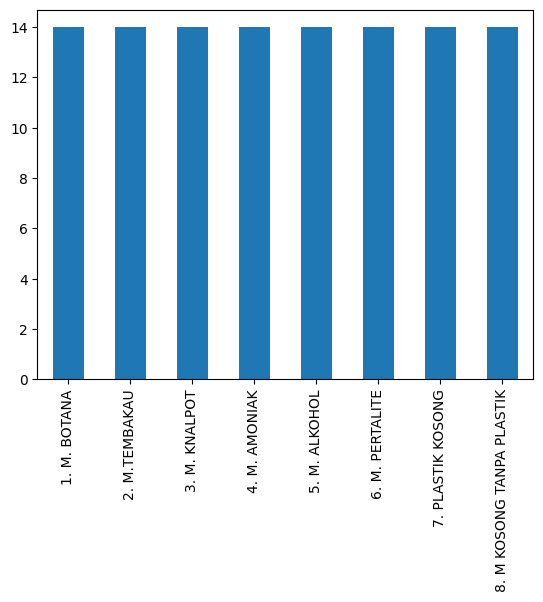

In [ ]:
# Menampilkan jumlah masing-masing data pada setiap kelas

df['Label'].value_counts().plot.bar()
print(df['Label'].value_counts())

print("\n Total Data: ", df.shape[0])

## Membaca dataset

In [ ]:
def read_matrix_from_file(file_name, file_extension):
    # Inisialisasi list kosong untuk menyimpan matriks
    matrix = []
    if(file_extension == 'txt'):
        # Buka file teks untuk dibaca
        with open(file_name, 'r') as file:
            # Baca setiap baris dalam file
            for line in file:
                # Pisahkan angka-angka dalam baris menggunakan spasi sebagai pemisah
                numbers = line.split()

                # Konversi angka-angka tersebut menjadi integer dan tambahkan ke dalam list matrix
                for number in numbers:
                    matrix.append(number)

    elif(file_extension == 'csv'):
        with open(file_name, 'r', newline='') as file:
            # Buat objek CSV reader
            csv_reader = csv.reader(file)

            # Loop melalui setiap baris dalam file
            for row in csv_reader:
                # Loop melalui setiap elemen dalam baris
                for item in row:
                    # Konversi elemen menjadi integer dan tambahkan ke dalam list matrix
                    matrix.append(item)
    else:
        print('Ekstensi file tidak valid')
    return matrix


In [ ]:
X = []
file_count = 0

for file_path in df['Path']:
    matrix = read_matrix_from_file(file_path, 'csv')
    np_matrix = np.array(matrix).reshape(768, 1)
    X.append(matrix)
    file_count +=1

X = np.array(X).reshape(file_count, 768, 1).astype(np.float32)

In [ ]:
X.shape

(112, 768, 1)

In [ ]:
X

array([[[40.48],
        [38.6 ],
        [40.38],
        ...,
        [41.1 ],
        [40.12],
        [42.59]],

       [[41.66],
        [39.15],
        [40.41],
        ...,
        [42.15],
        [42.85],
        [42.63]],

       [[41.7 ],
        [39.19],
        [39.94],
        ...,
        [42.2 ],
        [41.24],
        [42.13]],

       ...,

       [[42.35],
        [40.92],
        [41.57],
        ...,
        [41.24],
        [40.22],
        [43.3 ]],

       [[41.18],
        [40.37],
        [42.08],
        ...,
        [42.25],
        [42.42],
        [43.85]],

       [[41.77],
        [39.28],
        [41.05],
        ...,
        [41.75],
        [42.43],
        [42.74]]], dtype=float32)

Normalisasi label pada dataset

In [ ]:
y = df['Label']

# proses normalisasi dengan one-hot-encoder
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1, 1)).toarray()

## Pembagian dataset

In [ ]:
# Pengaturan parameter data testing yang ingin digunakan
test_size = 0.25 # jumlah data testing yang ingin diambil dari dataset (25%)
shuffle = True # data testing dari dataset di acak atau tidak

# Proses pembagian dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, shuffle=shuffle)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(84, 768, 1)
(84, 8)
(28, 768, 1)
(28, 8)


In [ ]:
# Menampilkan data train
X_train

array([[[40.97],
        [40.15],
        [40.34],
        ...,
        [42.61],
        [40.58],
        [41.44]],

       [[41.15],
        [40.32],
        [41.52],
        ...,
        [41.19],
        [41.82],
        [41.03]],

       [[41.26],
        [39.88],
        [40.58],
        ...,
        [41.81],
        [41.38],
        [42.8 ]],

       ...,

       [[40.35],
        [41.23],
        [38.74],
        ...,
        [40.05],
        [41.08],
        [40.85]],

       [[43.45],
        [40.3 ],
        [40.47],
        ...,
        [42.21],
        [42.33],
        [39.39]],

       [[41.68],
        [39.17],
        [40.43],
        ...,
        [41.66],
        [42.32],
        [41.54]]], dtype=float32)

In [ ]:
# Menampilkan label data train
y_train

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 

## Pembuatan Model CNN

### Arsitektur model CNN 1D

In [ ]:
X_train.shape

(84, 768, 1)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))

# compile model dengan metric akurasi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Visualisasi arsitektur CNN 1D

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 766, 32)           128       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 383, 32)           0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12256)             0         
                                                                 
 dense_1 (Dense)             (None, 8)                 98056     
                                                                 
Total params: 98184 (383.53 KB)
Trainable params: 98184 (383.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


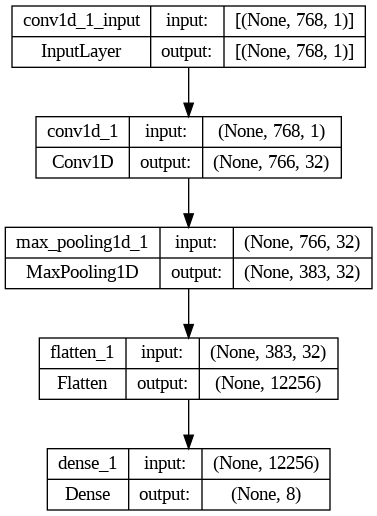

In [ ]:
# Visualisasi model cnn 1d
tf.keras.utils.plot_model(model, to_file='model_plot_cnn1dv2.png', show_shapes=True)

In [ ]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Pelatihan dengan CNN 1D

### Pengaturan parameter selama trainning

In [ ]:
# pengaturan parameter trainning
epochs = 250
batch_size = 8

### Proses trainning dataset

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
    )

Epoch 1/250
11/11 - 0s - loss: 79.5658 - accuracy: 0.1071 - 403ms/epoch - 37ms/step
Epoch 2/250
11/11 - 0s - loss: 40.2487 - accuracy: 0.1310 - 41ms/epoch - 4ms/step
Epoch 3/250
11/11 - 0s - loss: 20.3989 - accuracy: 0.0952 - 34ms/epoch - 3ms/step
Epoch 4/250
11/11 - 0s - loss: 13.4401 - accuracy: 0.1071 - 40ms/epoch - 4ms/step
Epoch 5/250
11/11 - 0s - loss: 10.4001 - accuracy: 0.0714 - 36ms/epoch - 3ms/step
Epoch 6/250
11/11 - 0s - loss: 6.6312 - accuracy: 0.0833 - 38ms/epoch - 3ms/step
Epoch 7/250
11/11 - 0s - loss: 11.8088 - accuracy: 0.1667 - 34ms/epoch - 3ms/step
Epoch 8/250
11/11 - 0s - loss: 8.4012 - accuracy: 0.1667 - 33ms/epoch - 3ms/step
Epoch 9/250
11/11 - 0s - loss: 7.9124 - accuracy: 0.1667 - 43ms/epoch - 4ms/step
Epoch 10/250
11/11 - 0s - loss: 7.0902 - accuracy: 0.1310 - 33ms/epoch - 3ms/step
Epoch 11/250
11/11 - 0s - loss: 5.4230 - accuracy: 0.1786 - 31ms/epoch - 3ms/step
Epoch 12/250
11/11 - 0s - loss: 3.7265 - accuracy: 0.2024 - 32ms/epoch - 3ms/step
Epoch 13/250
11/1

In [ ]:
# Menyimpan model dalam bentuk h5

save_path =  '/content/drive/MyDrive/model-cnn1dv2.h5'
model.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Menampilkan dataset untuk testing
X_test

array([[[41.66],
        [40.86],
        [41.99],
        ...,
        [41.14],
        [40.7 ],
        [43.76]],

       [[41.68],
        [39.17],
        [40.43],
        ...,
        [41.66],
        [42.32],
        [41.54]],

       [[40.48],
        [38.6 ],
        [40.38],
        ...,
        [41.1 ],
        [40.12],
        [42.59]],

       ...,

       [[41.17],
        [40.9 ],
        [41.01],
        ...,
        [41.72],
        [40.18],
        [41.05]],

       [[40.4 ],
        [40.68],
        [40.85],
        ...,
        [41.59],
        [40.  ],
        [41.99]],

       [[40.33],
        [39.5 ],
        [40.22],
        ...,
        [40.94],
        [40.98],
        [41.88]]], dtype=float32)

## Proses testing

### Testing menggunakan dataset testing

In [ ]:
# memprediksi dengan dataset testing
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)

y_label_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_label_test.flatten()

# menampilkan hasil testing berdasarkan data yang ada
jumlah_test=X_test.shape[1]
df.head(jumlah_test)

1/1 [==============================] - 0s 42ms/step


,Predicted Labels,Actual Labels
0,2. M.TEMBAKAU,2. M.TEMBAKAU
1,4. M. AMONIAK,4. M. AMONIAK
2,1. M. BOTANA,1. M. BOTANA
3,6. M. PERTALITE,5. M. ALKOHOL
4,7. PLASTIK KOSONG,7. PLASTIK KOSONG
5,1. M. BOTANA,1. M. BOTANA
6,7. PLASTIK KOSONG,7. PLASTIK KOSONG
7,1. M. BOTANA,1. M. BOTANA
8,1. M. BOTANA,7. PLASTIK KOSONG
9,3. M. KNALPOT,3. M. KNALPOT


### Visualisasi hasil dataset testing

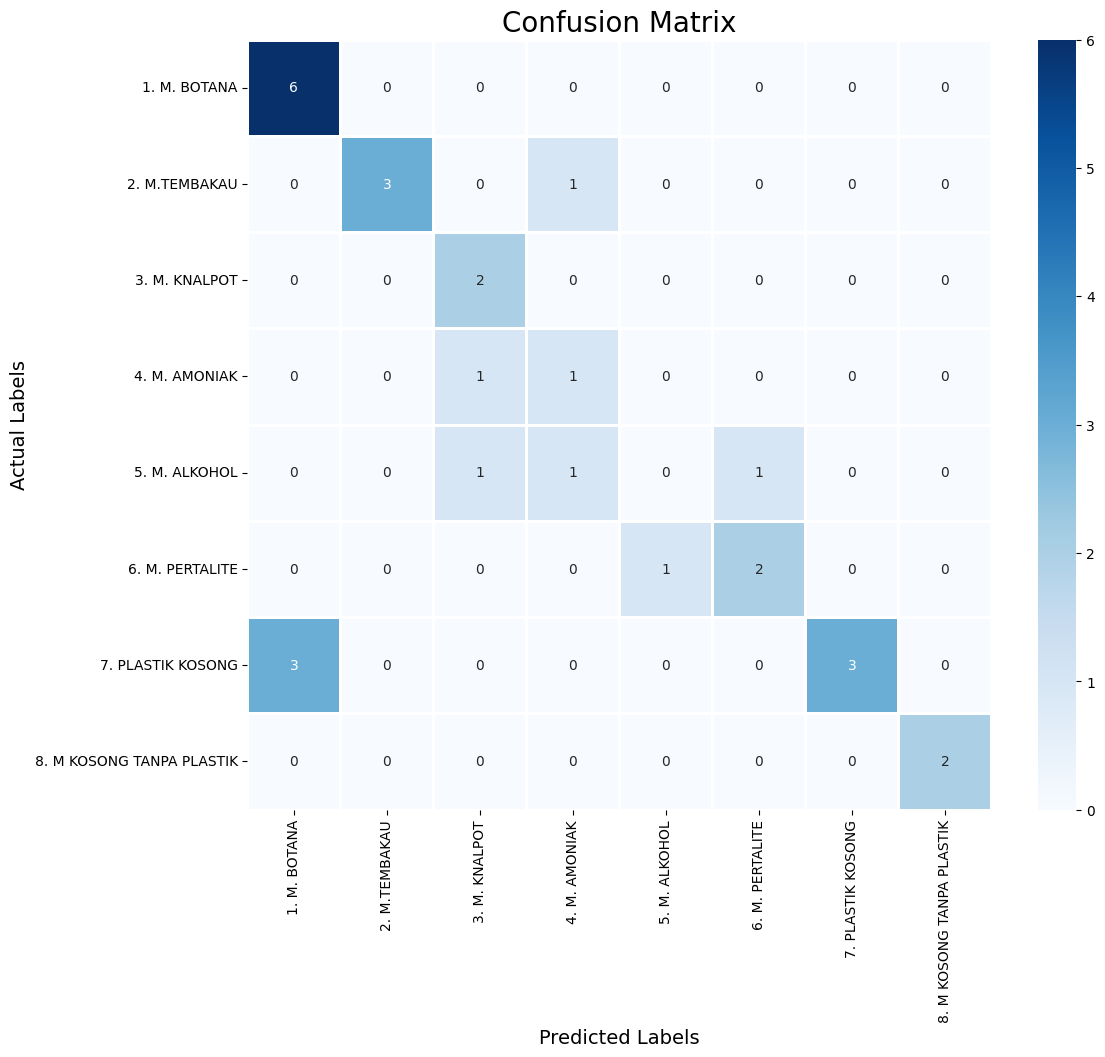

In [ ]:
# Memvisualisasikan hasil dataset testing pada confusion matrix
cm = confusion_matrix(y_label_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

### Testing menggunakan file tunggal .csv

In [ ]:
# Fungsi untuk melakukan prediksi pada sebuah file .csv
def predict_data_class(data_predict):
  prediction = model.predict(data_predict)

  label_pred = encoder.inverse_transform(prediction)
  name_class = label_pred[0][0]
  return name_class

In [ ]:
from google.colab import files

uploaded = files.upload()

file_path = list(uploaded.keys())[0]

csv_data = np.array(read_matrix_from_file(file_path, 'csv'))

csv_array = np.array(csv_data).astype(np.float32)

if csv_array.shape[0] == 768:
  csv_array = csv_array.reshape(1, 768, 1)
  print("Format data test sesuai")
else:
  print("Format data test tidak sesuai")

# display(csv_array)

name_class = predict_data_class(csv_array)
print("Label Kelas: " + name_class)

Saving pic_2023-10-08_16-49-49.csv to pic_2023-10-08_16-49-49.csv
Format data test sesuai
1/1 [==============================] - 0s 13ms/step
Label Kelas: 1. M. BOTANA
